<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/blob/master/explorando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/titanic/data

https://towardsdatascience.com/pandas-from-basic-to-advanced-for-data-scientists-aee4eed19cfe

https://medium.com/brasil-ai/antes-de-come%C3%A7armos-a-falar-sobre-tipos-de-aprendizados-que-veremos-no-pr%C3%B3ximo-artigo-%C3%A9-ea5b04685913

#entende os dados e separa os tipos das variaveis(Atributos):
##quantitativos - numericar
###continuas - número infinito e normalmente quebrados
###discretas - 
##qualitativos - categoricos, não contáveis/não aplicáveis em cálculos matemáticos
###ordinal- 
###nominal-

survival - se sobre vivel 0 - nao, 1 - sim

pclass - a classa do ticket das pessoas, 	1 = 1st, 2 = 2nd, 3 = 3rd

sex - o genero, male - masculino, female - feminino

Age - idade que vai de 0.42 a 80.0

In [1]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
renomear = {
    "PassengerId" : "id_passageiro",
    "Survived" : "sobrevivel",
    "Pclass" : "classe_passagem",
    "Name" : "nome",
    "Sex" : "genero",
    "Age" : "idade",
    "SibSp" : "numero_irmaos_conjuges_bordo",
    "Parch" : "numero_pais_filhos_bordo",
    "Ticket" : "numero_passagem",
    "Fare" : "preco_passagem",
    "Cabin" : "numero_cabine",
    "Embarked" : "qual_porto_embarque",
}

dados = dados.rename(columns = renomear)
dados.head()

,id_passageiro,sobrevivel,classe_passagem,nome,genero,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,numero_passagem,preco_passagem,numero_cabine,qual_porto_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb
#O pandas nos fornece a função corr() para calcular a correlação
dados.corr()

,id_passageiro,sobrevivel,classe_passagem,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,preco_passagem
id_passageiro,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
sobrevivel,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
classe_passagem,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
idade,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
numero_irmaos_conjuges_bordo,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
numero_pais_filhos_bordo,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
preco_passagem,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [0]:
#trabalhar as bases para ficar mais coerrente genero mudar para numero
trocar = {
    'male':0,
    'female':1
}
dados['sexo'] = dados.genero.map(trocar)

In [0]:
#mudar os portos para numeros C = Cherbourg, Q = Queenstown, S = Southampton
trocar = {
    'C':0,
    'Q':1,
    'S':2
}
dados['numero_porto_embarque'] = dados.qual_porto_embarque.map(trocar)

In [0]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
import matplotlib.pyplot as plt

In [7]:
#Para facilitar a visualização das correlações pode-se recorrer às cores
dados.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id_passageiro,sobrevivel,classe_passagem,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,preco_passagem,sexo,numero_porto_embarque
id_passageiro,1.0,-0.005,-0.034,0.041,-0.061,0.0012,-0.014,-0.043,0.018
sobrevivel,-0.005,1.0,-0.34,-0.053,0.089,0.14,0.32,0.54,-0.16
classe_passagem,-0.034,-0.34,1.0,-0.36,-0.043,-0.023,-0.69,-0.14,0.094
idade,0.041,-0.053,-0.36,1.0,-0.18,-0.25,0.14,-0.083,-0.014
numero_irmaos_conjuges_bordo,-0.061,0.089,-0.043,-0.18,1.0,0.45,0.45,0.2,0.012
numero_pais_filhos_bordo,0.0012,0.14,-0.023,-0.25,0.45,1.0,0.41,0.25,0.029
preco_passagem,-0.014,0.32,-0.69,0.14,0.45,0.41,1.0,0.26,-0.077
sexo,-0.043,0.54,-0.14,-0.083,0.2,0.25,0.26,1.0,-0.12
numero_porto_embarque,0.018,-0.16,0.094,-0.014,0.012,0.029,-0.077,-0.12,1.0


In [8]:
#Para facilitar a visualização das correlações pode-se recorrer às cores
dados.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id_passageiro,sobrevivel,classe_passagem,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,preco_passagem,sexo,numero_porto_embarque
id_passageiro,1.0,-0.005,-0.035,0.037,-0.058,-0.0017,0.013,-0.043,0.013
sobrevivel,-0.005,1.0,-0.34,-0.077,-0.035,0.082,0.26,0.54,-0.17
classe_passagem,-0.035,-0.34,1.0,-0.37,0.083,0.018,-0.55,-0.13,0.16
idade,0.037,-0.077,-0.37,1.0,-0.31,-0.19,0.096,-0.093,-0.033
numero_irmaos_conjuges_bordo,-0.058,-0.035,0.083,-0.31,1.0,0.41,0.16,0.11,0.069
numero_pais_filhos_bordo,-0.0017,0.082,0.018,-0.19,0.41,1.0,0.22,0.25,0.04
preco_passagem,0.013,0.26,-0.55,0.096,0.16,0.22,1.0,0.18,-0.23
sexo,-0.043,0.54,-0.13,-0.093,0.11,0.25,0.18,1.0,-0.11
numero_porto_embarque,0.013,-0.17,0.16,-0.033,0.069,0.04,-0.23,-0.11,1.0


In [9]:
#Para facilitar a visualização das correlações pode-se recorrer às cores
dados.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id_passageiro,sobrevivel,classe_passagem,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,preco_passagem,sexo,numero_porto_embarque
id_passageiro,1.0,-0.0041,-0.027,0.028,-0.048,0.0008,-0.0089,-0.035,0.014
sobrevivel,-0.0041,1.0,-0.32,-0.043,0.086,0.13,0.27,0.54,-0.16
classe_passagem,-0.027,-0.32,1.0,-0.29,-0.04,-0.021,-0.57,-0.13,0.083
idade,0.028,-0.043,-0.29,1.0,-0.14,-0.2,0.093,-0.069,-0.011
numero_irmaos_conjuges_bordo,-0.048,0.086,-0.04,-0.14,1.0,0.43,0.36,0.19,0.011
numero_pais_filhos_bordo,0.0008,0.13,-0.021,-0.2,0.43,1.0,0.33,0.25,0.027
preco_passagem,-0.0089,0.27,-0.57,0.093,0.36,0.33,1.0,0.21,-0.053
sexo,-0.035,0.54,-0.13,-0.069,0.19,0.25,0.21,1.0,-0.11
numero_porto_embarque,0.014,-0.16,0.083,-0.011,0.011,0.027,-0.053,-0.11,1.0


podemos dizer que oq mais tem correçã ona sobrevivencia é o sexo, preço da passagem.

mais o sexo tbm é afetado pela preço da passagem.

o preço da passagem é afetado pelo parente a bordo será que isso afeta na sobrevivencia.

Analizar cada iten faz sentido em afetar na sobrevivencia e o quanto afeta:

*   **id_passagem** nao afeta em nada so com um acaso exemplo todo id par sobrevivel.
*   **porto de embarque** nao afetaria a mesmo que todos q subiram abordo de um lugar determinado tiver algum previlegio em si tanto fisico quanto acesso.
*   **idade** aparente mente nao influencia em nada, a não ser melheres e crianças primeiro.
*   **genero** aparentemente influenciou um grante parte na sobrevivencia.
*   **preço** aparentimente influenciou bem, talveis por conta do acesso melhor e privilegios.
*   **classe** nao demostra influencia mas tbm nao faz sentido se o preço afeta a classe deveria.
*   **numero_pais_filhos e numero_irmaos_conjuges** aparentemente afeta um pena parcela, talveis as pessoa salvaram seus parentes ou foram junto.



In [10]:
dados.describe()

,id_passageiro,sobrevivel,classe_passagem,idade,numero_irmaos_conjuges_bordo,numero_pais_filhos_bordo,preco_passagem,sexo,numero_porto_embarque
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,1.535433
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


aqui vemos que logo de cara a idade esta faltando de algumas pessoas e tambem o porto de embarque

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4add0b8400>,
      dtype=object)

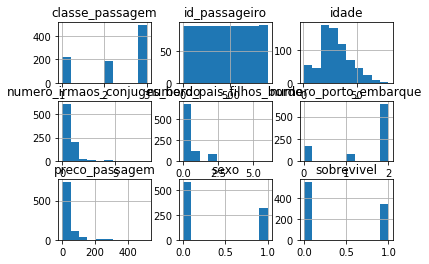

In [11]:
dados.hist()

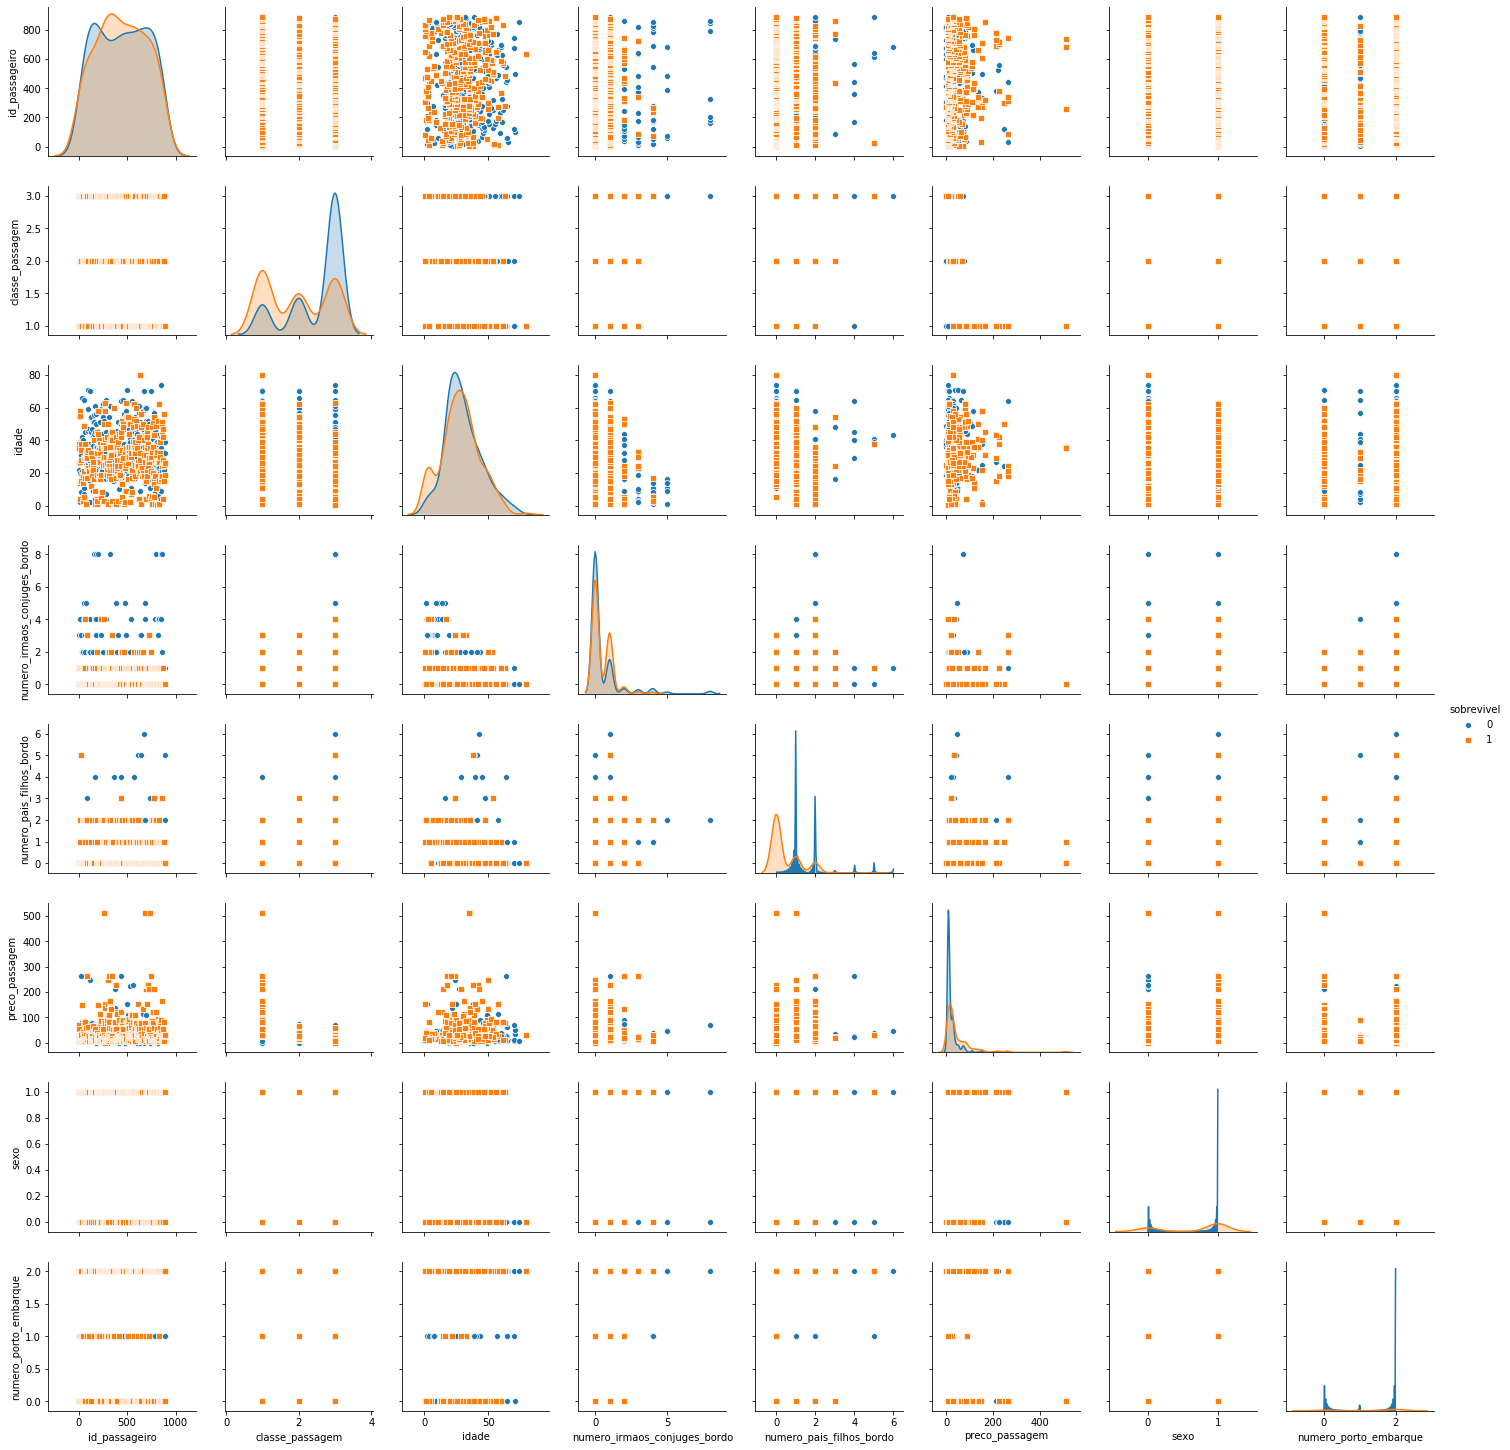

In [12]:
#distribuicao
import seaborn as sns
sns.pairplot(dados, hue="sobrevivel", markers=["o", "s"])

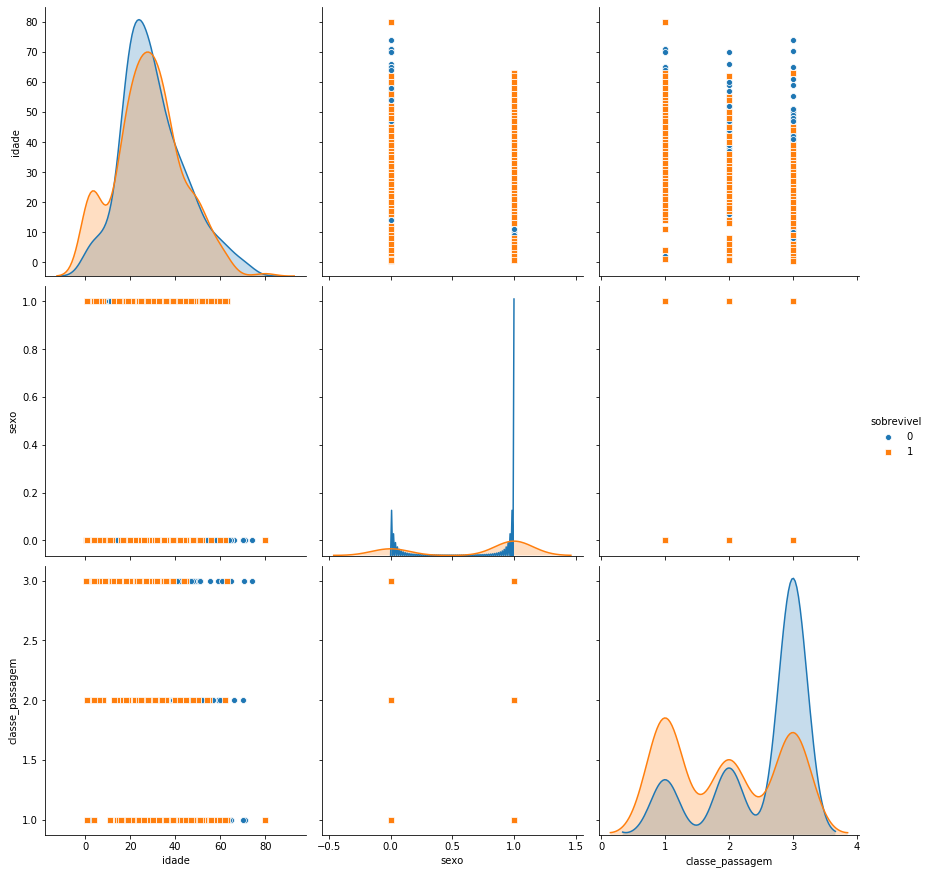

In [13]:
#distribuicao da idade de sobrevivente
#distribuicao de sexo por sobrevivente
#distribuicao de classe por sobrevivente
sns.pairplot(dados[['idade', 'sexo', 'classe_passagem','sobrevivel']], hue="sobrevivel", height=4, markers=["o", "s"])

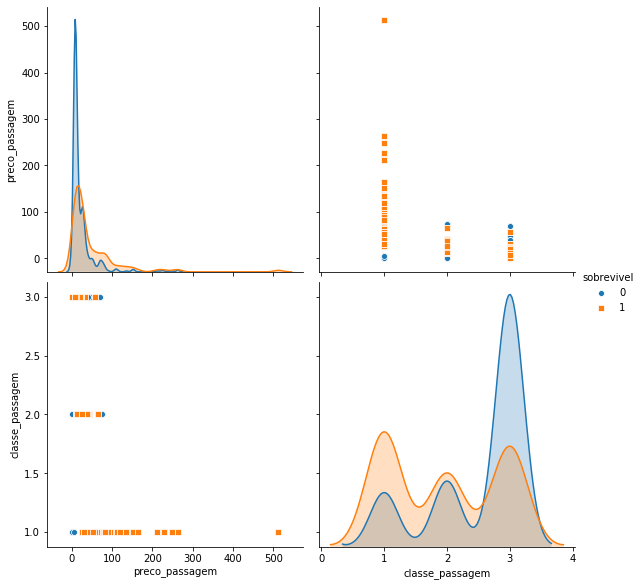

In [14]:
sns.pairplot(dados[['preco_passagem', 'classe_passagem','sobrevivel']], hue="sobrevivel", height=4, markers=["o", "s"])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


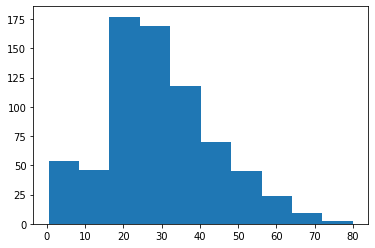

In [15]:
plt.hist(dados['idade'])
plt.show()

In [16]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


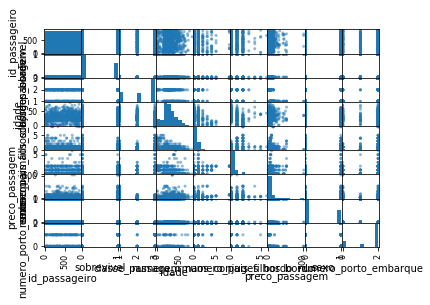

In [17]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

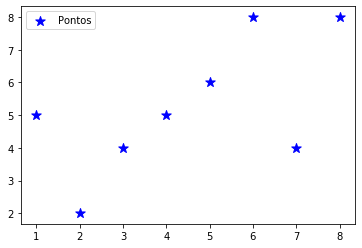

In [18]:
import matplotlib.pyplot as plt

# Definindo variáveis
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 2, 4, 5, 6, 8, 4, 8]
 
# Criando um gráfico	
plt.scatter(x, y, label = 'Pontos', color = 'b', marker = '*', s = 100)
plt.legend()
  